# Sprint 1 – Baseline Classifier & Sentiment Notebook

This notebook runs Sprint 1 tasks:
- Load sample tickets
- Preprocess with `TextProcessor`
- Run rule-based classifier + improved classifier
- Run sentiment analysis
- Visualize confusion matrix & sentiment distribution

In [7]:
import os, sys, json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Get project root (assuming notebook is in notebooks/)
ROOT = Path(os.getcwd()).resolve().parent
APP_PATH = ROOT / "app"

if str(APP_PATH) not in sys.path:
    sys.path.append(str(APP_PATH))

print("Project root:", ROOT)
print("App path added:", APP_PATH)

Project root: /Users/user/Downloads/hackathon
App path added: /Users/user/Downloads/hackathon/app


In [17]:
from preprocessing.text_processor import text_processor
from models.rule_based_classifier import RuleBasedClassifier
from models.improved_classifier import ImprovedClassifier
from models.sentiment_analyzer import SentimentAnalyzer

rule_clf = RuleBasedClassifier()
improved_clf = ImprovedClassifier(training_data_path="../data/expanded_tickets.json")
sentiment = SentimentAnalyzer()

In [19]:
# Load dataset
candidates = [ROOT/'data/expanded_tickets.json', ROOT/'notebooks/expanded_tickets.json']
for path in candidates:
    if path.exists():
        with open(path) as f:
            data = json.load(f)
        df = pd.DataFrame(data)
        break
else:
    df = pd.DataFrame([
        {"id": 1, "text": "I cannot access my account.", "category": "account", "sentiment": "negative"},
        {"id": 2, "text": "Thank you for fixing the issue.", "category": "general", "sentiment": "positive"},
        {"id": 3, "text": "Billing error on my invoice.", "category": "billing", "sentiment": "negative"}
    ])
df.head()

,id,text,category,sentiment
0,1,I cannot access my account. It says my passwor...,account,negative
1,2,I was charged $50 extra on my monthly bill. Th...,billing,negative
2,3,The app keeps crashing when I try to upload fi...,bug,negative
3,4,I would like to request a new feature for dark...,feature,positive
4,5,How do I set up two-factor authentication?,technical,neutral


In [21]:
# Preprocess
df['clean_text'] = df['text'].apply(text_processor.preprocess)
df.head()

,id,text,category,sentiment,clean_text
0,1,I cannot access my account. It says my passwor...,account,negative,cannot access account. say password incorrect.
1,2,I was charged $50 extra on my monthly bill. Th...,billing,negative,charged 50 extra monthly bill. incorrect.
2,3,The app keeps crashing when I try to upload fi...,bug,negative,app keep crashing try upload files.
3,4,I would like to request a new feature for dark...,feature,positive,would like request new feature dark mode.
4,5,How do I set up two-factor authentication?,technical,neutral,set two-factor authentication?


In [25]:
# Rule-based classifier
df['rule_pred'] = df['clean_text'].apply(lambda x: rule_clf.classify(x)[0])

# Improved classifier
df['improved_pred'] = df['clean_text'].apply(lambda x: improved_clf.classify(x)[0])

# Sentiment analyzer (your SentimentAnalyzer has analyze_sentiment)
df['sentiment_pred'] = df['clean_text'].apply(lambda x: sentiment.analyze_sentiment(x)['sentiment'])

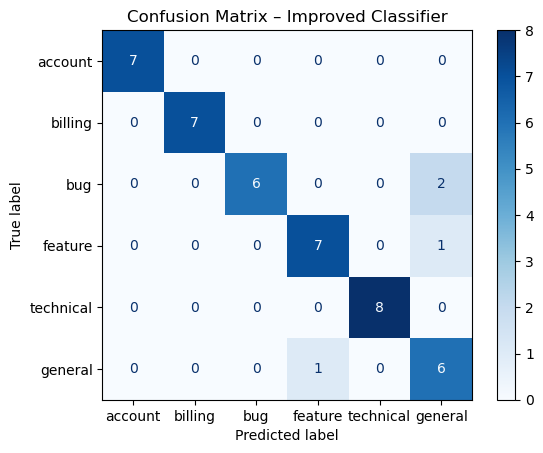

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df['category'], df['improved_pred'], labels=df['category'].unique())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['category'].unique())
disp.plot(cmap='Blues')
plt.title('Confusion Matrix – Improved Classifier')
plt.show()

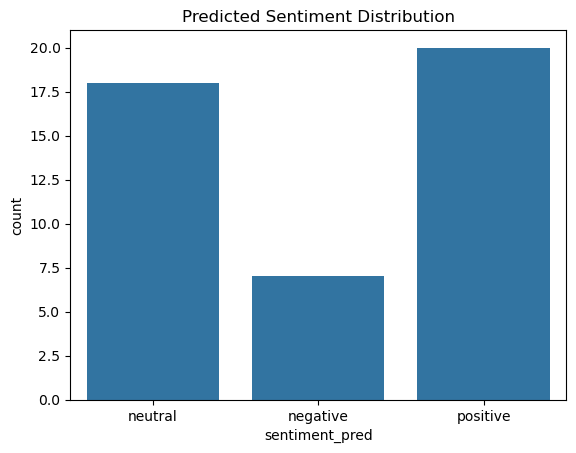

In [29]:
# Sentiment distribution
sns.countplot(x='sentiment_pred', data=df)
plt.title('Predicted Sentiment Distribution')
plt.show()